In [3]:
# !pip install seaborn
# !pip install blackcellmagic

# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user

# !pip install jupyter_nbextensions_configurator
# !jupyter nbextensions_configurator enable --user

# !jupyter nbextension install https://github.com/drillan/jupyter-black/archive/master.zip --user
# !jupyter nbextension enable jupyter-black-master/jupyter-black

### statsmodels-0.10.1
# !pip install statsmodels

In [4]:
# import tensorflow as tf

# tf.enable_eager_execution()

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm, cnames

import numpy as np
import pandas as pd

import h5py

import pickle
import cv2
import os

import PIL

# import time
import pathlib

from sklearn.decomposition import PCA, FastICA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, r2_score

from pandas.plotting import scatter_matrix

from scipy.stats import gaussian_kde
from scipy.signal import find_peaks, argrelmax

from math import sqrt, log

from itertools import combinations, combinations_with_replacement

from cycler import cycler


from time import time

from matplotlib.ticker import NullFormatter

from sklearn.manifold import TSNE
from sklearn.cluster import OPTICS, cluster_optics_dbscan

from sklearn.cluster import Birch, MiniBatchKMeans, KMeans
from itertools import cycle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import NearestNeighbors

from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial import KDTree

import seaborn as sns
from matplotlib.colors import ListedColormap

from matplotlib.gridspec import GridSpec
from matplotlib.path import Path

from scipy.stats import normaltest, mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection

In [6]:
pd.set_option("display.float_format", lambda x: "{:.3f}".format(x))

df = pd.read_csv("/data/fp_cluster.csv")
df = df.set_index("ID")

display(df[:10])
# display(df.describe().T)

col_factors = ["factor{}".format(i) for i in range(7)]
col_attributes = [
    "year",
    "N_Housings",
    "N_Units",
    "Max_Floors",
    "Area",
    "Rooms",
    "Baths",
]

Unnamed: 0  true_year  prediction  row  factor0  factor1  factor2  \
ID                                                                              
2829_105             0      0.520       0.564    0    0.611    1.785   -0.388   
999_37               1      0.360       0.407    1   -2.766   -0.138   -0.335   
7770_55A             2      0.200       0.392    2   -4.549    0.465    1.008   
2140_92B             3      0.520       0.500    3   -0.829    1.609    0.456   
509_73               4      0.500       0.486    4   -0.539    1.325   -0.499   
19478_113            5      0.740       0.750    5   -0.055   -0.499    0.356   
8657_70              6      0.360       0.408    6   -3.012    0.229   -0.304   
1856_61              7      0.400       0.461    7   -2.442    0.647    0.642   
25606_107C           8      0.740       0.726    8    0.198    0.026    0.414   
27502_140B           9      0.840       0.780    9    0.512   -0.255    0.544   

            factor3  factor4  factor5  ...  norm_log_area  area_85  Entrance  \
ID                                     ...                                     
2829_105     -0.324    0.403   -0.914  ...         -0.010     True       복도식   
999_37        0.763    0.294    1.408  ...         -3.228    False       복도식   
7770_55A     -0.274   -0.669   -0.723  ...         -2.057    False       복도식   
2140_92B     -0.606   -0.178    0.384  ...         -0.665    False       계단식   
509_73        0.784    0.302   -0.240  ...         -1.385    False       복도식   
19478_113    -1.959    0.827    0.324  ...         -0.010     True       계단식   
8657_70      -0.009    0.197    0.447  ...         -1.346    False       계단식   
1856_61      -0.463    0.314    0.458  ...         -1.769    False       계단식   
25606_107C   -0.265    1.089   -2.190  ...         -0.025     True       계단식   
27502_140B   -0.059   -0.924   -0.956  ...          0.865    False       계단식   

            Rooms  Baths  group_area   tsne0   tsne1  cluster0 cluster1  
ID                                                                       
2829_105        3      2        85m2  17.511 -49.942         2       42  
999_37          1      1         NaN -34.132 -26.655         1       21  
7770_55A        2      1         NaN -49.837 -35.383         1       13  
2140_92B        3      1        60m2 -13.985 -55.294         2       27  
509_73          2      1        60m2  -9.185 -50.509         2       28  
19478_113       3      2        85m2  33.671  45.368         4      116  
8657_70         3      1        60m2 -37.420 -30.588         1       16  
1856_61         3      1        60m2 -31.818 -42.848         1       18  
25606_107C      3      2        85m2  24.476  11.676         5      106  
27502_140B      4      2       Above  32.229   4.493         5      112  

[10 rows x 33 columns]

In [7]:
# df_rep.to_csv("/data/df_rep.csv")

df_rep = pd.read_csv("/data/df_rep.csv")
df_rep = df_rep.set_index("cluster1").sort_index()

# Representative floorplans


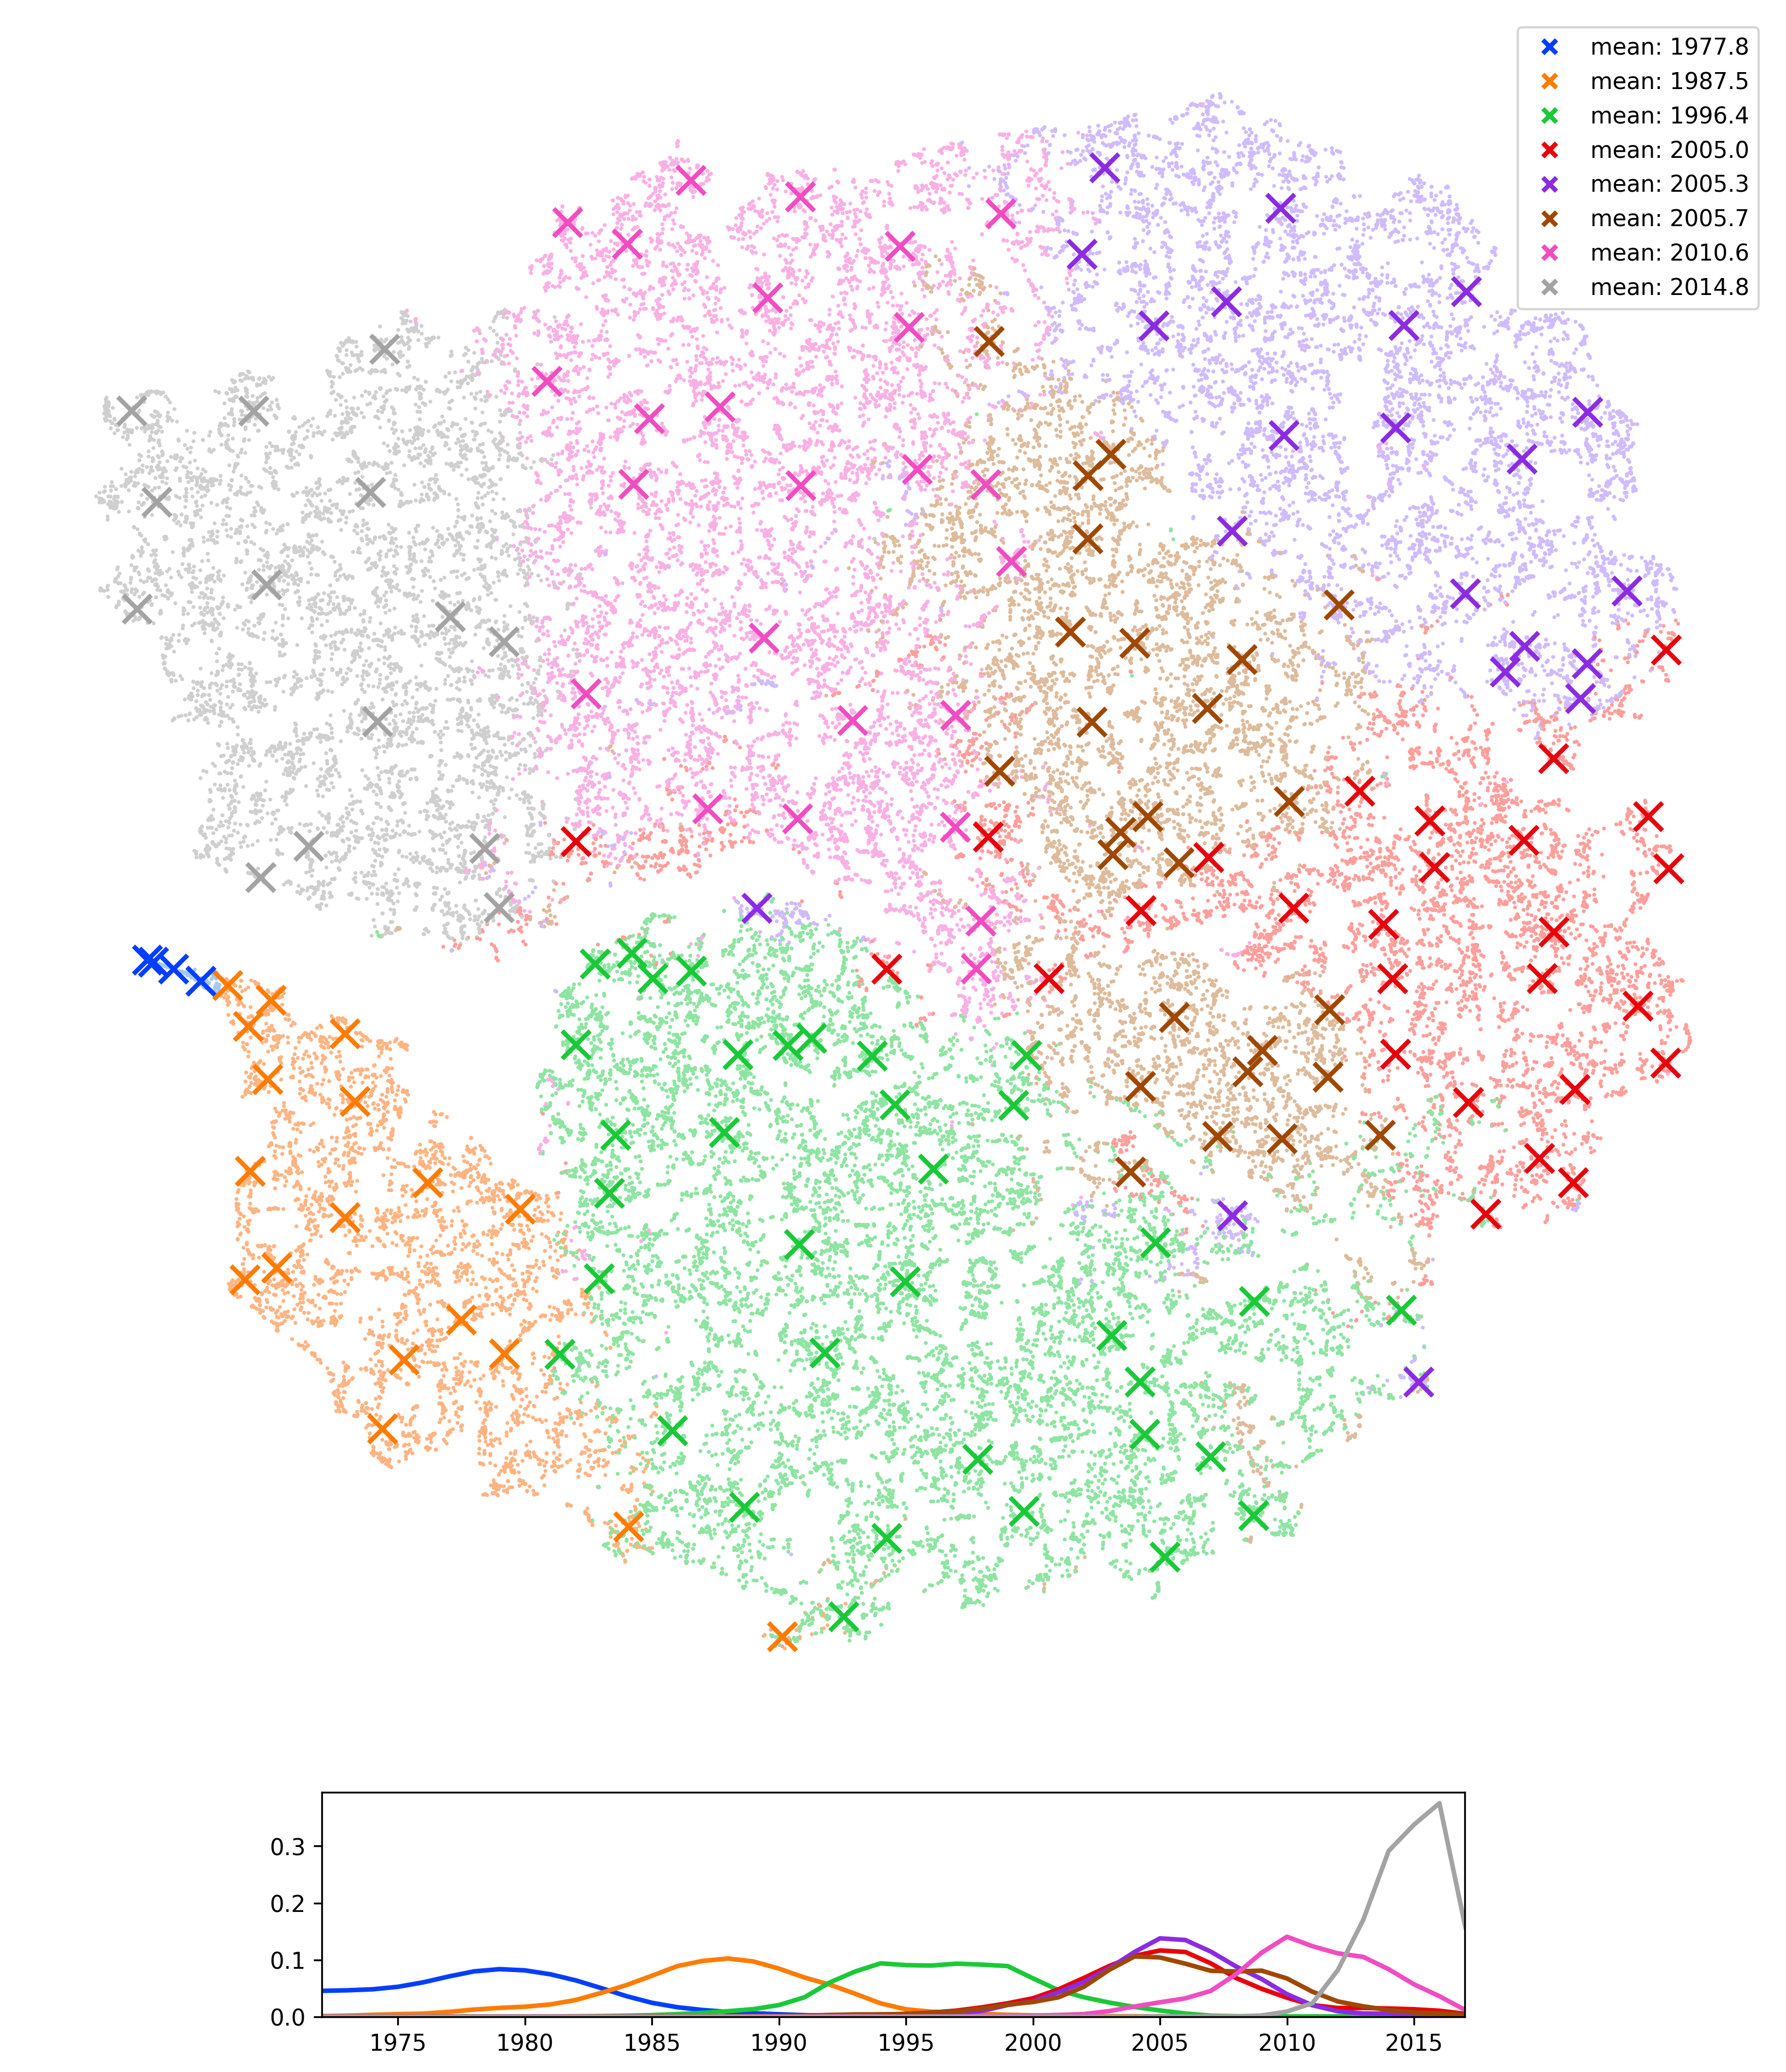

In [8]:
# fig, axes = plt.subplots(2, figsize=(11, 15), dpi=300)

fig = plt.figure(figsize=(11, 13), dpi=300)
gs = GridSpec(2, 3, height_ratios=[8, 1], width_ratios=[1, 5, 1])

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 1])

# t-SNE map by clusters

ax1.axis("off")
ax1.set_aspect("equal")
scatter1 = ax1.scatter(
    df["tsne0"],
    df["tsne1"],
    marker=".",
    s=2,
    c=df["cluster0"],
    cmap=ListedColormap(sns.color_palette("pastel", 8)),
    alpha=1,
)
scatter3 = ax1.scatter(
    df_rep["tsne0"],
    df_rep["tsne1"],
    marker="x",
    s=150,
    lw=2,
    c=df_rep["cluster0"],
    cmap=ListedColormap(sns.color_palette("bright", 8)),
    alpha=1,
)

avg_years = df["year"].groupby(df["cluster0"]).mean()
ax1.legend(
    [x for _, x in sorted(zip(avg_years, scatter3.legend_elements()[0]))],
    [
        f"mean: {avg}"
        for _, avg in sorted(zip(avg_years, avg_years.map("{:.1f}".format)))
    ],
)

# kde for year by clusters

col_cluster = "cluster0"
n_cluster = df[col_cluster].max() + 1

colors = sns.color_palette("bright", n_cluster)

years = df["year"]
xlim = years.quantile([0.0005, 0.9995])

for c in range(n_cluster):
    kernel = gaussian_kde(years.loc[df[col_cluster] == c])
    xs = np.arange(years.min(), years.max() + 0.001, 1)
    ys = kernel(xs)
    ax2.plot(xs, ys, c=colors[c], linewidth=2, alpha=1)

xlim = years.quantile([0.0005, 0.9995])
ax2.set_xlim(xlim)
ax2.set_ylim(bottom=0)

plt.tight_layout()

fig.savefig("cluster_year.png", dpi=300, bbox_inches="tight")

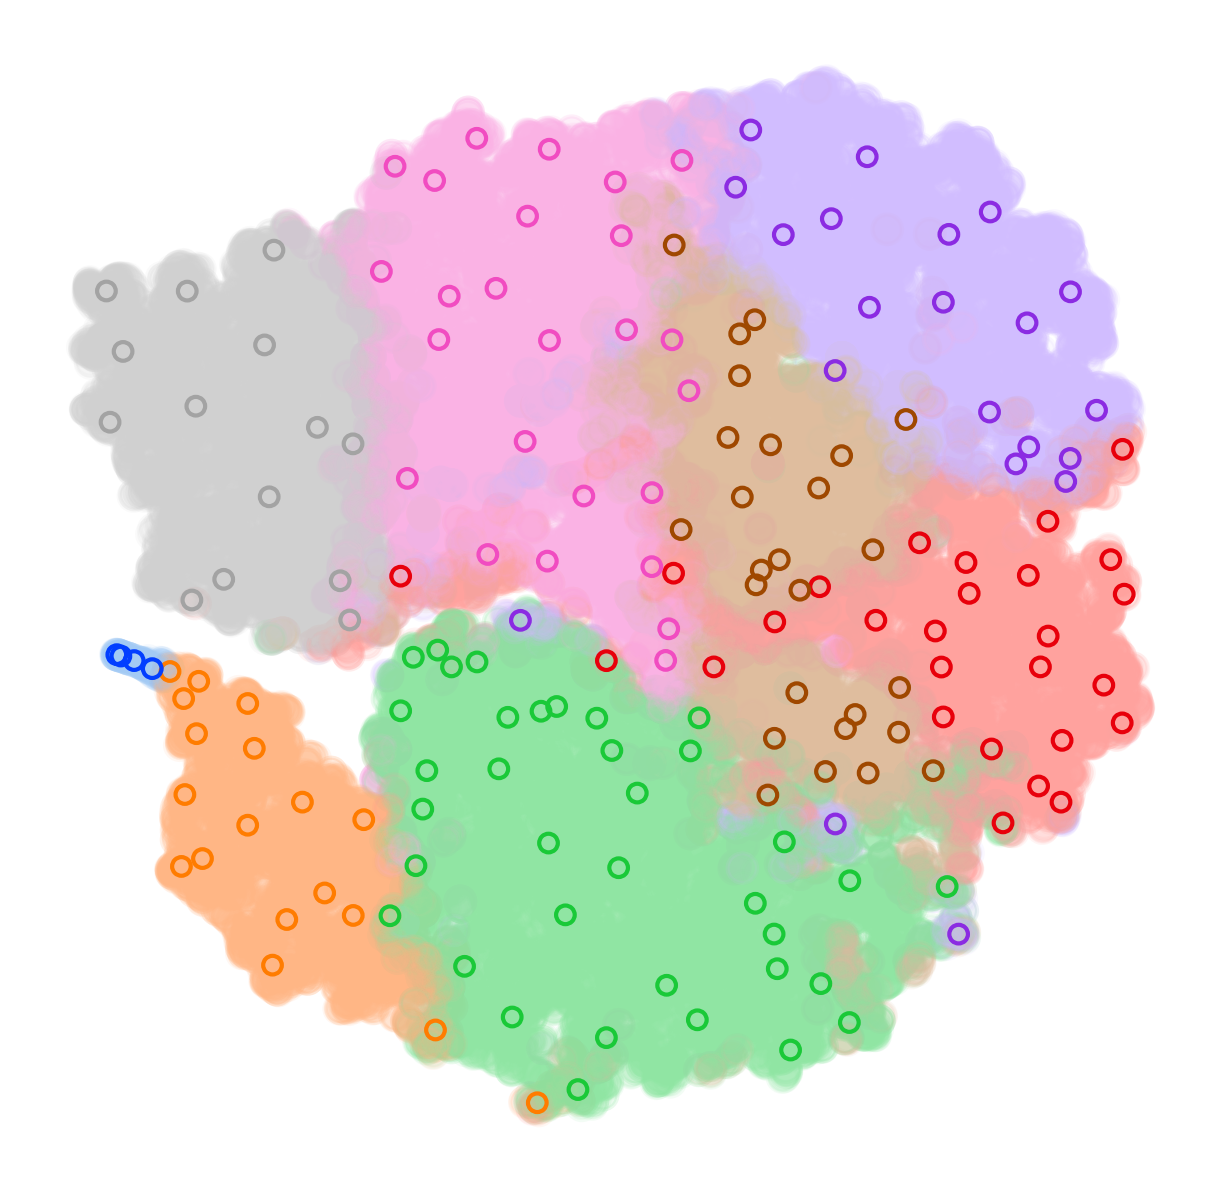

In [9]:
# mini map

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.gca()
ax.axis("off")
ax.set_aspect("equal")
scatter1 = ax.scatter(
    df["tsne0"],
    df["tsne1"],
    marker=".",
    s=200,
    c=df["cluster0"],
    cmap=ListedColormap(sns.color_palette("pastel", 8)),
    alpha=0.1,
)

color = ListedColormap(sns.color_palette("bright", 8))(df_rep["cluster0"])
scatter3 = ax.scatter(
    df_rep["tsne0"],
    df_rep["tsne1"],
    marker="o",
    s=20,
    lw=1,
    edgecolors=color,
    facecolors="none",
    alpha=1,
)

# Evolution between the clusters

In [10]:
# Year distribution of clusters are not normal (nonparametric)

pd.DataFrame(
    [
        normaltest(x).pvalue
        for (_, x) in list(df.groupby("cluster1")["year"])
        if len(x) >= 8
    ]
).describe()

0
count 169.000
mean    0.047
std     0.136
min     0.000
25%     0.000
50%     0.000
75%     0.005
max     0.935

In [11]:
(
    df[df["cluster1"] == 10]["year"].mean(),
    df[df["cluster1"] == 11]["year"].mean(),
    df[df["cluster1"] == 12]["year"].mean(),
)

(1985.313725490196, 1986.6146341463414, 1986.8595505617977)

In [12]:
# Mann-Whitney U test for test difference in values

mannwhitneyu(
    df[df["cluster1"] == 11]["year"],
    df[df["cluster1"] == 10]["year"],
    alternative="greater",
)  # is a later (greater in year) than b?

MannwhitneyuResult(statistic=38415.0, pvalue=7.218242614546537e-06)

In [13]:
f_pvalue = lambda a, b: mannwhitneyu(
    df[df["cluster1"] == a]["year"],
    df[df["cluster1"] == b]["year"],
    alternative="greater",
)[1]
# returns only p value
# f_pvalue(11,10)

grid = np.indices((171, 171))
pvalue_later = np.vectorize(f_pvalue)(grid[0], grid[1])

(f_pvalue(11, 10), pvalue_later[11, 10], f_pvalue(11, 10) == pvalue_later[11, 10])

(7.218242614546537e-06, 7.218242614546537e-06, True)

In [14]:
# Benjamini/Yekutieli method for FDR = 0.05 with negative correlation
is_later, adj_pvalue = [
    x.reshape(171, 171) for x in fdrcorrection(pvalue_later.flatten(), method="negcorr")
]

# not adjusted
# adj_pvalue = 0.05
# is_later = pvalue_later < adj_pvalue

print(is_later.dtype, is_later.shape)
print(is_later[11, 10], is_later[12, 10])
print(adj_pvalue[11, 10], adj_pvalue[12, 10])

# number of pairs that a is later than b
print(np.count_nonzero(is_later), "out of", 171 ** 2)

bool (171, 171)
True True
0.00017619704221228353 1.749181086814278e-08
13707 out of 29241


(0, 0.1)

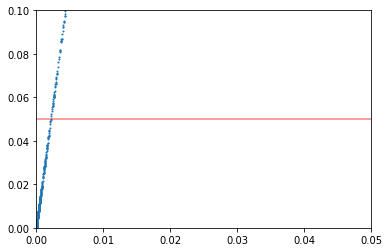

In [15]:
plt.scatter(pvalue_later, adj_pvalue, s=1)
plt.axhline(y=0.05, c="r", alpha=0.5)
plt.xlim(0, 0.05)
plt.ylim(0, 0.10)

In [16]:
df_center = df.groupby("cluster1")[col_factors].median()
df_center.describe()

factor0  factor1  factor2  factor3  factor4  factor5  factor6
count  171.000  171.000  171.000  171.000  171.000  171.000  171.000
mean    -0.084    0.119   -0.556    0.050   -0.216   -0.045   -0.098
std      1.181    0.951    3.433    0.956    1.116    1.130    0.931
min     -4.621   -1.476  -33.398   -2.639   -5.521   -2.893   -1.587
25%     -0.087   -0.677   -0.241   -0.303   -0.759   -0.744   -0.574
50%      0.172   -0.136    0.102    0.137   -0.020   -0.099   -0.323
75%      0.479    1.030    0.283    0.609    0.542    0.625    0.103
max      4.486    2.110    1.014    2.194    1.907    3.704    4.938

In [17]:
df_center[is_later[10, :]]

factor0  factor1  factor2  factor3  factor4  factor5  factor6
cluster1                                                               
0           4.486    1.845  -33.398   -0.236   -0.020   -2.741    1.835
1           1.875    0.756  -21.871   -0.014    0.550   -1.211    0.430
2          -0.131   -0.136  -14.649    0.080    0.112    0.626   -0.164
3          -1.770   -0.356   -7.491    0.156   -0.070    1.609   -0.431
4          -1.202   -0.146  -10.562    0.364    0.382    0.410   -0.317
5          -2.603   -0.492   -4.375    0.187   -0.009    1.467   -0.598
6          -2.917    0.094   -4.742   -0.072    0.382   -0.495   -0.163
7          -3.495    0.101   -2.195    0.153    0.188   -0.161   -0.177
8          -3.073   -0.266   -2.068    0.138   -0.307    1.467   -0.379
9          -4.208    0.055   -0.796    0.171    0.240   -0.859   -0.041

In [18]:
np.count_nonzero(is_later, axis=1)[:20]

array([ 0,  0,  0,  1,  2,  2,  3,  7,  7,  7, 10, 11, 11, 11, 14, 13, 14,
       17, 17, 14])

In [19]:
distances = np.zeros(171, dtype=float)
parents = np.zeros(171, dtype=int)
print(parents.dtype, parents.shape)

for i in range(171):
    if np.count_nonzero(is_later[i, :]):
        tree = KDTree(df_center[is_later[i, :]])
        distances[i], parents[i] = tree.query(df_center.loc[i])
    else:
        distances[i], parents[i] = -1, -1

print(distances)
print(parents)

int64 (171,)
[-1.         -1.         -1.         15.18003521  4.25102248 10.61682997
  3.71852636  2.64893441  2.3936888   4.17946776  1.72203052  1.36784229
  1.13529839  1.65629025  1.13478349  2.10678164  1.20638248  1.25186457
  1.20527121  3.94511189  9.26961944  1.23724432  1.26212066  2.02900224
  1.42705425  1.70588278  1.16400853  1.26697415  1.06101824  1.35540383
  1.15468674  1.03191035  1.14998584  0.89491778  1.11579291  1.05436289
  1.240104    1.68082343  0.98622981  0.95178847  0.90573782  1.26444688
  1.02007409  1.71511346  1.18535684  1.13091139  1.19448276  0.90452068
  1.15662685  1.14054309  1.10304422  1.00387755  1.15313685  1.20779514
  2.29205202  1.23706717  1.36018994  1.70649727  1.2694641   1.82634809
  1.5894617   1.40369354  1.98377668  1.13919933  1.71854328  1.50621014
  1.2566255   1.43494022  1.76942003  1.77347714  1.64957328  1.07095988
  1.78734518  1.65754208  1.56967059  2.22768495  1.75413916  1.36123312
  1.58046964  1.79880482  2.35811086  

(168,) (168,)
[-60.366173 -59.88912  -59.88912  -58.328762 -52.508476 -50.73584
 -52.508476 -52.363064 -52.363064 -44.201035]


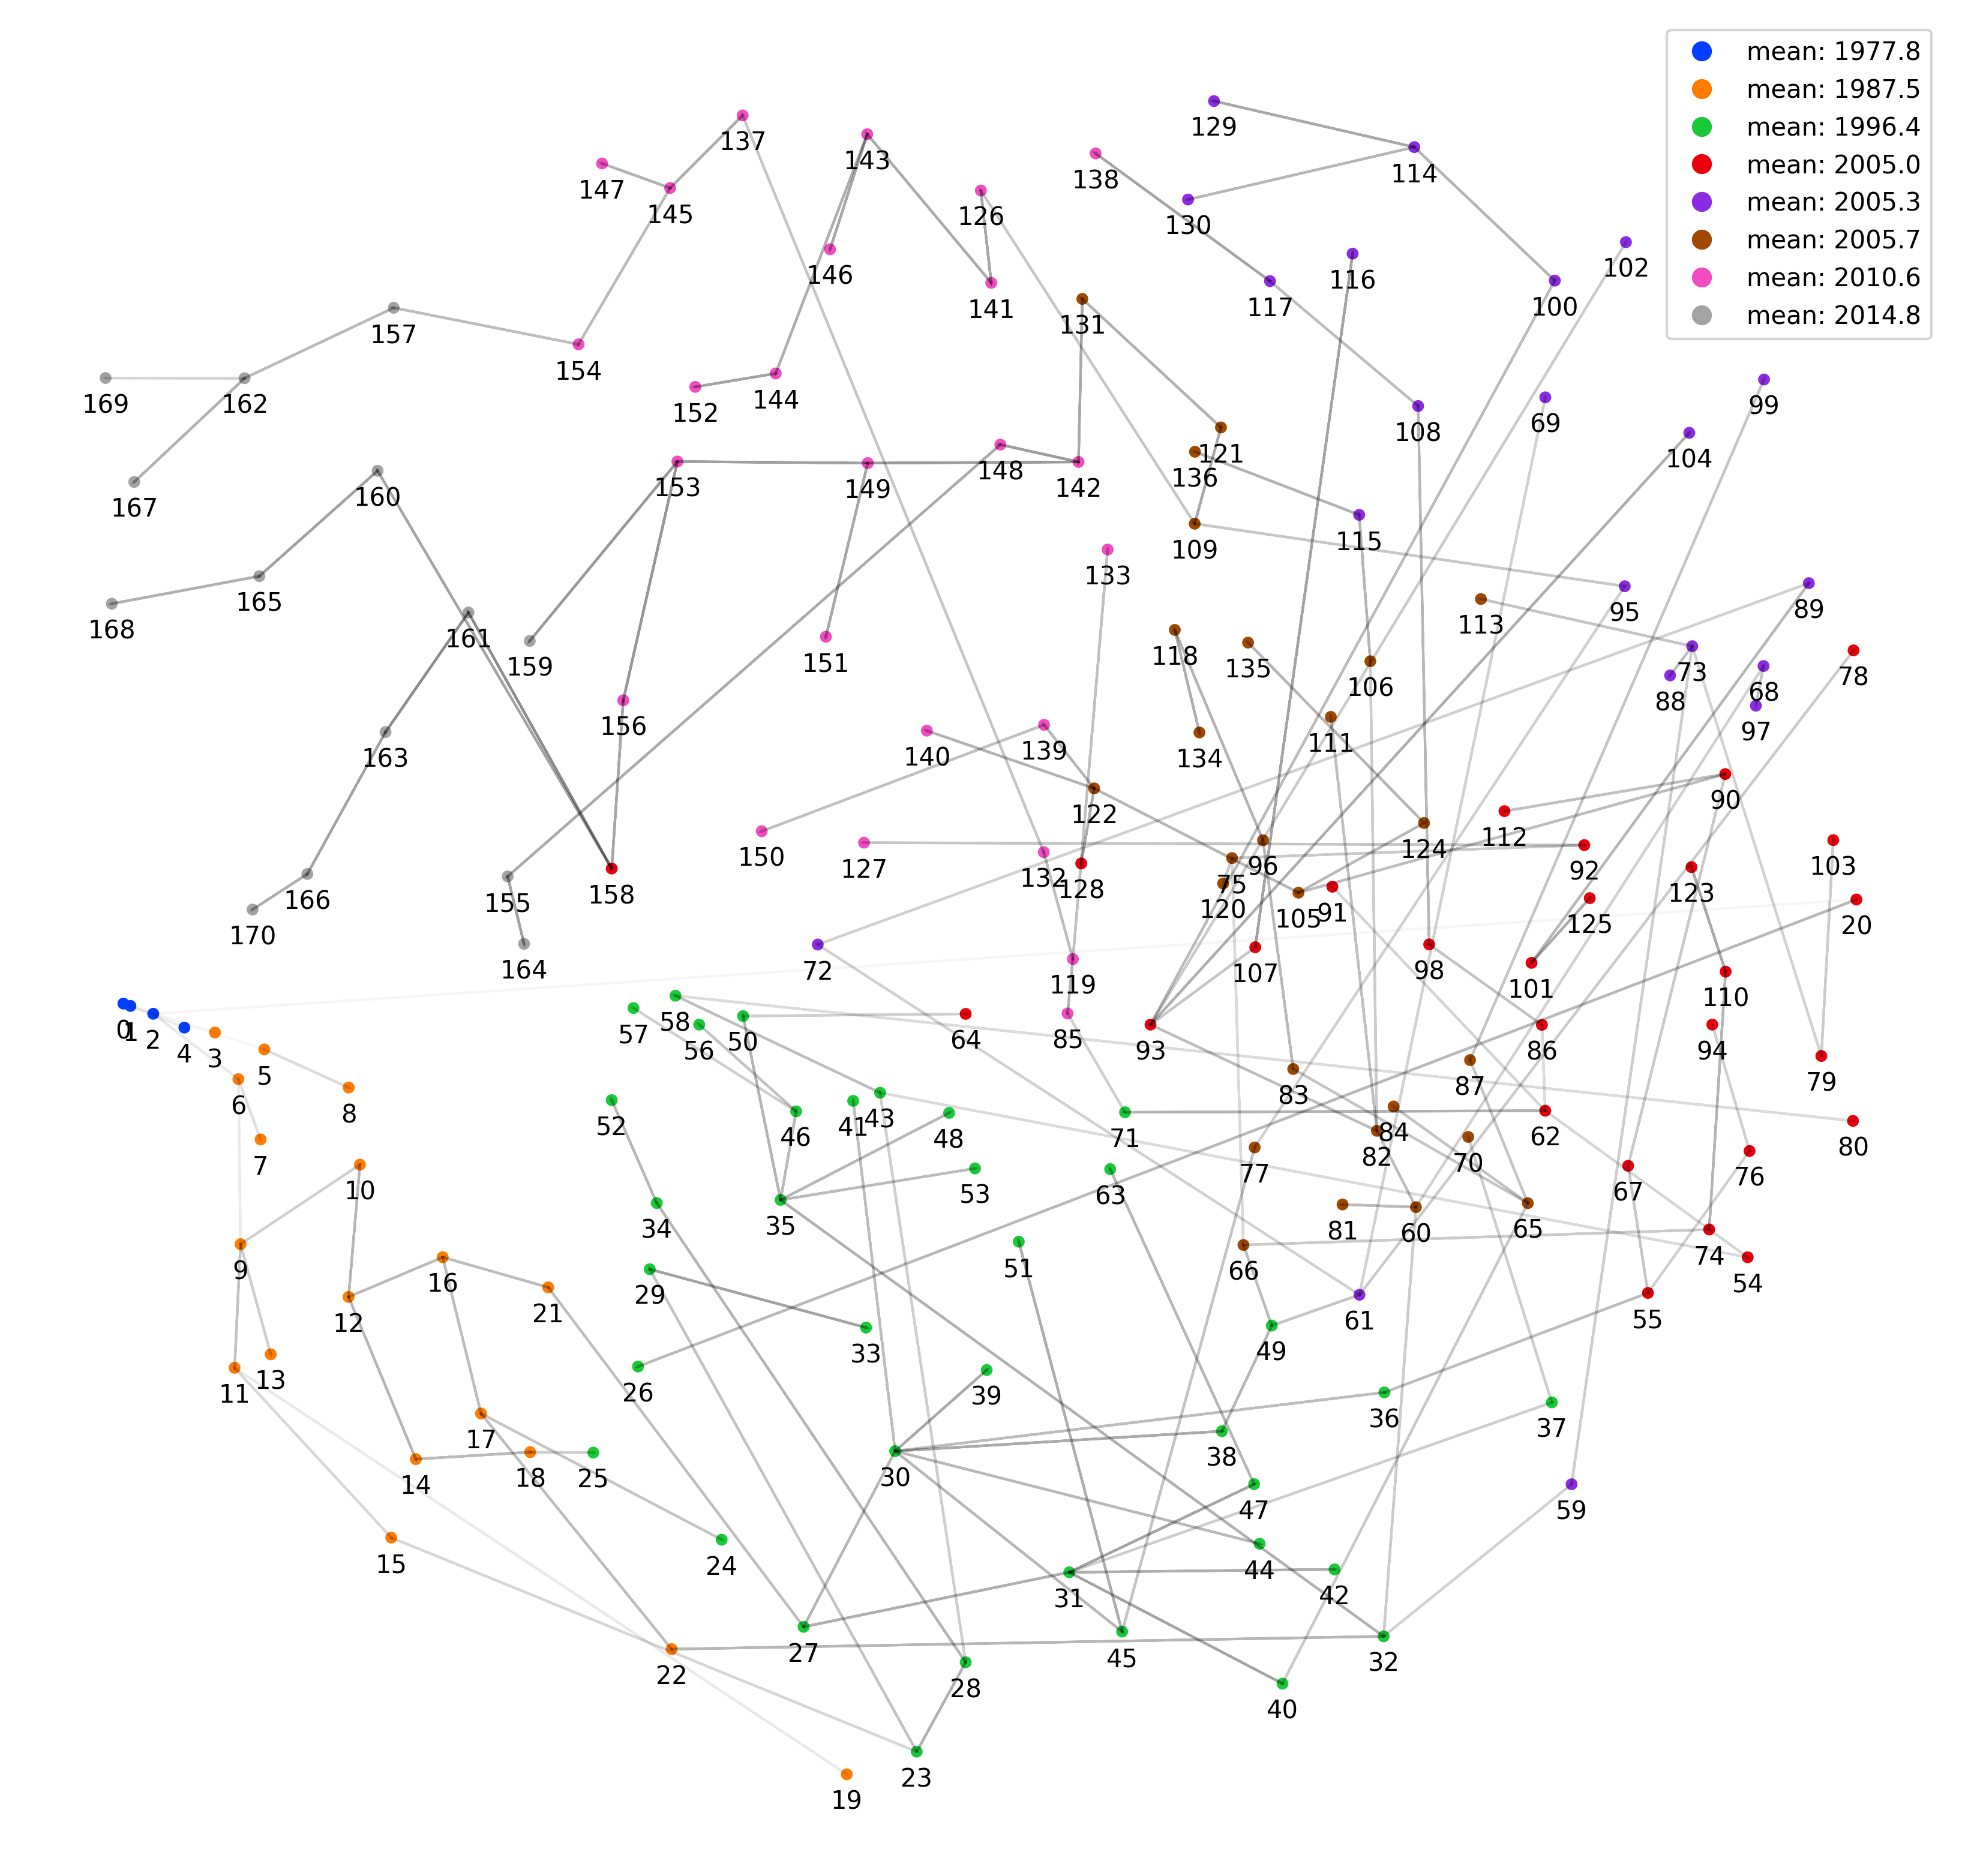

In [20]:
xs_child = df_rep["tsne0"][parents >= 0].to_numpy()
ys_child = df_rep["tsne1"][parents >= 0].to_numpy()

xs_parent = df_rep["tsne0"].to_numpy()[parents[parents >= 0]]
ys_parent = df_rep["tsne1"].to_numpy()[parents[parents >= 0]]

alphas = (distances[parents >= 0].min() - 0.4) / distances[parents >= 0]
print(xs_child.shape, xs_parent.shape)
print(xs_parent[:10])

fig = plt.figure(figsize=(11, 13), dpi=300)
ax = fig.gca()

# t-SNE map by clusters

ax.axis("off")
ax.set_aspect("equal")

scatter = ax.scatter(
    df_rep["tsne0"],
    df_rep["tsne1"],
    marker=".",
    s=30,
    lw=2,
    c=df_rep["cluster0"],
    cmap=ListedColormap(sns.color_palette("bright", 8)),
    alpha=1,
)

for x, y, dx, dy, a in zip(
    xs_parent, ys_parent, xs_child - xs_parent, ys_child - ys_parent, alphas
):
    ax.arrow(x, y, dx, dy, alpha=a)

for i, (x, y) in enumerate(zip(df_rep["tsne0"], df_rep["tsne1"])):
    ax.text(x, y - 1, i, ha="center", va="top")


avg_years = df["year"].groupby(df["cluster0"]).mean()
ax.legend(
    [x for _, x in sorted(zip(avg_years, scatter.legend_elements()[0]))],
    [
        f"mean: {avg}"
        for _, avg in sorted(zip(avg_years, avg_years.map("{:.1f}".format)))
    ],
)

plt.tight_layout()

# fig.savefig(".png", dpi=300, bbox_inches="tight")

In [150]:
index_tsne = np.unique(
    np.concatenate(
        [
            df.index.to_series().sample(frac=0.1, random_state=1106).to_numpy(),
            df_rep.ID.to_numpy(),
        ]
    )
)
df_tsne = df.loc[index_tsne]

kl_divergence_dict = {}

In [151]:
len(index_tsne), len(df_tsne.loc[df_rep.ID])

(5209, 171)

In [152]:
perplexities = [2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000]

X = df_tsne[col_factors]
X.describe()

factor0  factor1  factor2  factor3  factor4  factor5  factor6
count 5209.000 5209.000 5209.000 5209.000 5209.000 5209.000 5209.000
mean    -0.010   -0.006   -0.009   -0.005   -0.007   -0.001    0.010
std      1.009    0.991    1.035    1.019    1.005    1.001    1.008
min     -5.706   -3.008  -33.608   -3.820   -6.469   -5.989   -2.297
25%     -0.120   -0.801   -0.179   -0.424   -0.490   -0.579   -0.572
50%      0.195   -0.312    0.078    0.112    0.114    0.024   -0.258
75%      0.513    0.913    0.328    0.613    0.660    0.567    0.202
max      4.537    2.781    1.875    3.299    3.058    4.660    6.118

In [153]:
for p in perplexities:
    if p not in kl_divergence_dict:
        print(f"Computing perplexity {p}...", end=" ")
        tsne = TSNE(perplexity=p, n_iter=10000, random_state=1106)
        Y = tsne.fit_transform(X)

        df_tsne[f"perplexity{p}_0"] = Y[:, 0]
        df_tsne[f"perplexity{p}_1"] = Y[:, 1]
        kl_divergence_dict[p] = tsne.kl_divergence_
        print("Done.")

Computing perplexity 2... Done.
Computing perplexity 3... Done.
Computing perplexity 5... Done.
Computing perplexity 10... Done.
Computing perplexity 20... Done.
Computing perplexity 30... Done.
Computing perplexity 50... Done.
Computing perplexity 100... Done.
Computing perplexity 200... Done.
Computing perplexity 300... Done.
Computing perplexity 500... Done.
Computing perplexity 1000... Done.
Computing perplexity 2000... Done.


In [154]:
print(perplexities)
print(kl_divergence_dict)
print(df_tsne.info())

[2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000]
{2: 0.7906734347343445, 3: 0.9563305974006653, 5: 1.1371699571609497, 10: 1.2848963737487793, 20: 1.3163188695907593, 30: 1.2938660383224487, 50: 1.2022123336791992, 100: 1.045113205909729, 200: 0.8376368284225464, 300: 0.7066419720649719, 500: 0.5643921494483948, 1000: 0.3848155438899994, 2000: 0.2639578878879547}
<class 'pandas.core.frame.DataFrame'>
Index: 5209 entries, 10001_56A to 998_100
Data columns (total 59 columns):
Unnamed: 0           5209 non-null int64
true_year            5209 non-null float64
prediction           5209 non-null float64
row                  5209 non-null int64
factor0              5209 non-null float64
factor1              5209 non-null float64
factor2              5209 non-null float64
factor3              5209 non-null float64
factor4              5209 non-null float64
factor5              5209 non-null float64
factor6              5209 non-null float64
year                 5209 non-null int64
N_

(0, 1.3841135191174005)

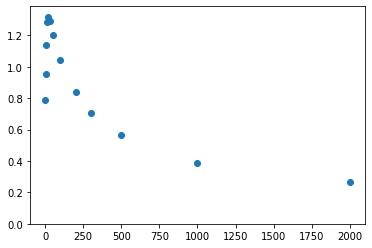

In [155]:
plt.scatter(kl_divergence_dict.keys(), kl_divergence_dict.values())
plt.ylim(bottom=0)

In [156]:
### https://arxiv.org/abs/1708.03229

n = len(X)  # number of data points (floorplans)
pBIC = {p: 2 * kl + log(n) * p / n for p, kl in kl_divergence_dict.items()}

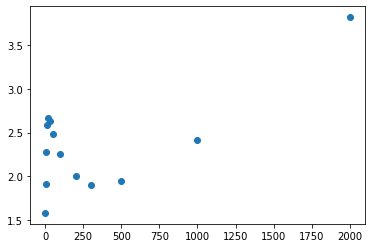

In [157]:
plt.scatter(pBIC.keys(), pBIC.values())

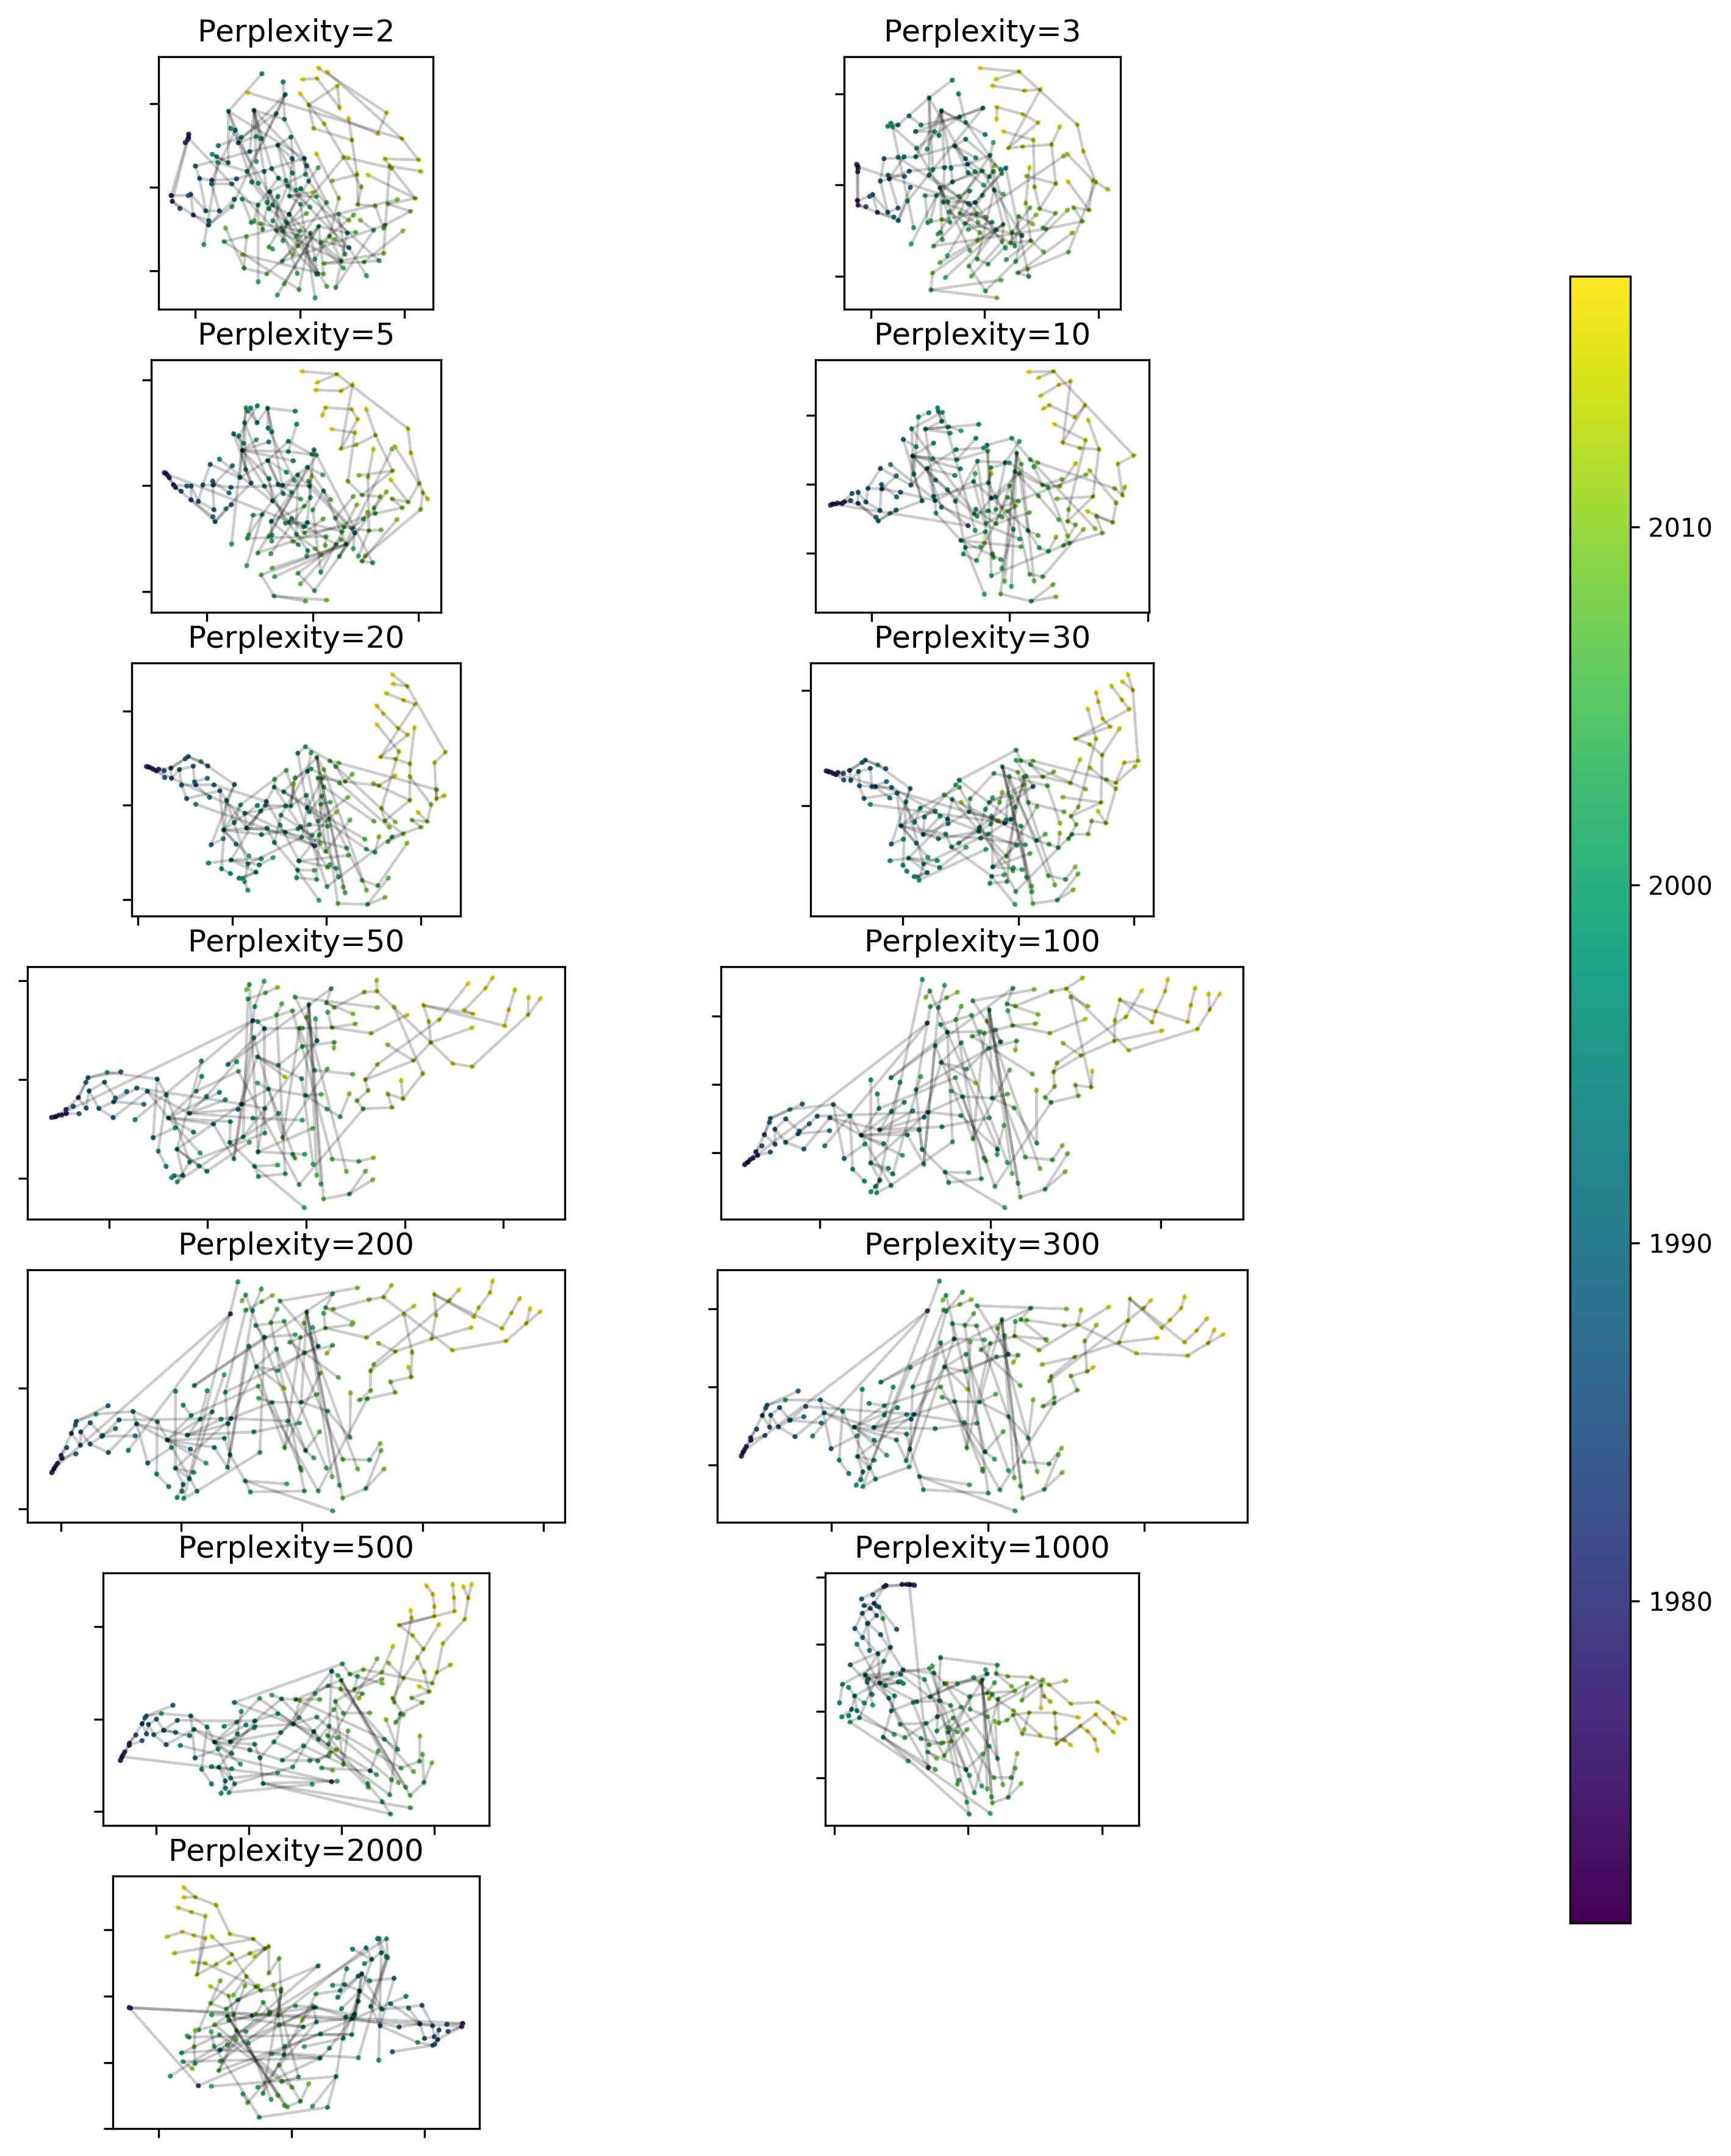

In [158]:
df_y_rep = df_tsne.loc[df_rep.ID]

n_cols = 2
n_rows = (len(perplexities) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 15), dpi=300)
axes = axes.flatten()
[axes[i].set_axis_off() for i in range(len(perplexities), len(axes))]

fig.subplots_adjust(right=0.75)


for i, perplexity in enumerate(perplexities):
    Y = ys[i]

    ax = axes[i]
    ax.set_title(f"Perplexity={perplexity}")
    ax.scatter(
        df_y_rep[f"perplexity{perplexity}_0"],
        df_y_rep[f"perplexity{perplexity}_1"],
        c=df_rep["year"],
        marker=".",
        s=4,
    )
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

    xs_child = df_y_rep[f"perplexity{perplexity}_0"][parents >= 0].to_numpy()
    ys_child = df_y_rep[f"perplexity{perplexity}_1"][parents >= 0].to_numpy()

    xs_parent = (
        df_y_rep[f"perplexity{perplexity}_0"].iloc[parents[parents >= 0]].to_numpy()
    )
    ys_parent = (
        df_y_rep[f"perplexity{perplexity}_1"].iloc[parents[parents >= 0]].to_numpy()
    )

    for x, y, dx, dy in zip(
        xs_parent, ys_parent, xs_child - xs_parent, ys_child - ys_parent
    ):
        ax.arrow(x, y, dx, dy, alpha=0.2)

#     for i, (x, y) in enumerate(
#         zip(
#             df_y_rep[f"perplexity{perplexity}_0"], df_y_rep[f"perplexity{perplexity}_1"]
#         )
#     ):
#         ax.text(x, y - 1, i, ha="center", va="top")

cbar_ax = fig.add_axes([0.90, 0.2, 0.03, 0.6])
cbar = fig.colorbar(ax.collections[0], cax=cbar_ax)
cbar.set_ticks(np.append(cbar.get_ticks(), df["year"].max()))

[axes[i].set_aspect("equal") for i in range(len(perplexities))]

plt.show()
# too big for pdf
# fig.savefig("tsne_by_perplexity.png")